### 03 Keras (케라스)

📌딥러닝 준비

1-1 주요 용어
- 하이퍼파라미터 (Hyperparameter)
    * 사용자가 직접 설정해는 설정 값
    * 학습 속도, 반복 횟수, ...
- 과소적합 vs 과대적합 (Underfitting vs Overfitting)
- 에포크 (Epoch)
    * 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프
- 손실 함수 (Loss function)
    * binary_crossentropy : 이진 분류
    * categorical_crossentropy : 다중 분류 (클래스가 원-핫 벡터인 경우)
    * sparse_categorical_crossentropy : 다중 분류 (클래스가 레이블 값인 경우)

In [2]:
import tensorflow as tf

In [3]:
# 클래스
tf.losses.BinaryCrossentropy()

# 함수
tf.losses.binary_crossentropy

<function keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0, axis=-1)>

- 경사하강법 (Gradient descent)
    * 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 최소 함수 값을 갖도록 하는 방법

1-2 딥러닝 프로세스
1. 데이터 전처리
2. 모델 생성
3. 모델 컴파일
4. 모델 훈련
5. 모델 검증
6. 모델 예측

📌단순 신경망 훈련
- 단순 선형 회귀 모델

In [4]:
import numpy as np

In [5]:
# 샘플 데이터 생성
x = np.arange(1, 6)

# y = 3 * x + 2
y = 3 * x + 2

print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


In [6]:
import matplotlib.pyplot as plt

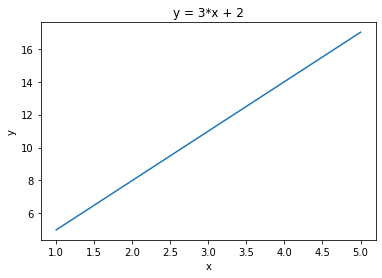

In [7]:
# 시각화
plt.plot(x, y)
plt.title('y = 3*x + 2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

🔹Sequential API 사용해 모델 구성

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [9]:
model = Sequential()

In [10]:
# 단순선형회귀모델 정의
# x값을 나타내는 입력 변수 1개 존재 --> input_shape = [1]
model.add(Dense(1, input_shape = [1]))

In [11]:
# 모델 요약
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 컴파일
model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mae'])

In [13]:
# 훈련
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 476ms/step - loss: 281.5757 - mae: 15.5223
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 164.1248 - mae: 11.8769
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 95.6800 - mae: 9.0941
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 55.7935 - mae: 6.9696
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 32.5493 - mae: 5.3477


🔹위 모델은 과소적합 상태

In [14]:
model = Sequential()
model.add(Dense(1, input_shape = (1,)))

model.compile(optimizer = 'sgd', loss = 'mse', metrics = ['mae'])

history = model.fit(x, y, epochs = 1200)

Epoch 1/1200
1/1 [==============================] - 0s 247ms/step - loss: 134.8181 - mae: 10.8379
Epoch 2/1200
1/1 [==============================] - 0s 3ms/step - loss: 78.6557 - mae: 8.3168
Epoch 3/1200
1/1 [==============================] - 0s 3ms/step - loss: 45.9264 - mae: 6.3921
Epoch 4/1200
1/1 [==============================] - 0s 3ms/step - loss: 26.8528 - mae: 4.9227
Epoch 5/1200
1/1 [==============================] - 0s 4ms/step - loss: 15.7370 - mae: 3.8008
Epoch 6/1200
1/1 [==============================] - 0s 4ms/step - loss: 9.2587 - mae: 2.9442
Epoch 7/1200
1/1 [==============================] - 0s 2ms/step - loss: 5.4828 - mae: 2.2902
Epoch 8/1200
1/1 [==============================] - 0s 3ms/step - loss: 3.2819 - mae: 1.7908
Epoch 9/1200
1/1 [==============================] - 0s 3ms/step - loss: 1.9987 - mae: 1.4094
Epoch 10/1200
1/1 [==============================] - 0s 4ms/step - loss: 1.2503 - mae: 1.1181
Epoch 11/1200
1/1 [==============================] - 0s 3ms/

In [15]:
import pandas as pd

pd.DataFrame(history.history)

,loss,mae
0,134.818100,10.837923
1,78.655655,8.316821
2,45.926369,6.392114
3,26.852753,4.922683
4,15.736986,3.800802
...,...,...
1195,0.000067,0.007036
1196,0.000067,0.007012
1197,0.000066,0.006989
1198,0.000066,0.006965


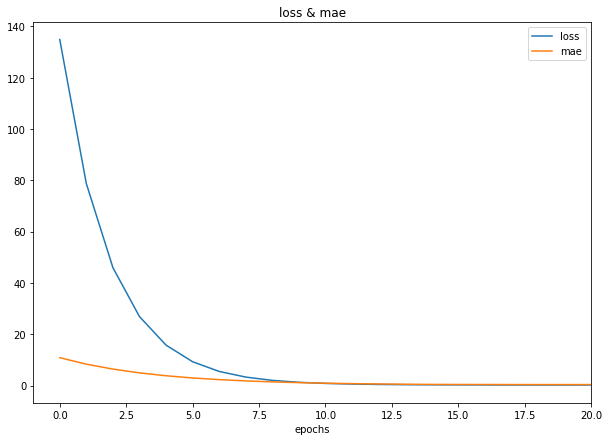

In [23]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.xlim(-1, 20)
plt.title('loss & mae')
plt.xlabel('epochs')
plt.show()

In [24]:
# 검증
model.evaluate(x, y)

# [loss, mae] 출력

1/1 [==============================] - 0s 265ms/step - loss: 6.4958e-05 - mae: 0.0069


[6.495834531961009e-05, 0.006917762570083141]

In [25]:
# 예측
model.predict([10])

array([[32.033436]], dtype=float32)

In [26]:
print(3 * 10 + 2)

32


🔹x = 10일 때 y = 32임을 감안한다면 정답에 꽤 근사한 값을 예측한 것을 볼 수 있음

📌 심층 신경망으로 이미지 분류

In [3]:
# 케라스 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

NameError: name 'tf' is not defined

In [57]:
(X_tr, y_tr), (X_te, y_te) = mnist.load_data()

In [58]:
# 데이터셋 확인
print('train set: ', X_tr.shape, y_tr.shape)
print('test set: ', X_te.shape, y_te.shape)

train set:  (60000, 28, 28) (60000,)
test set:  (10000, 28, 28) (10000,)


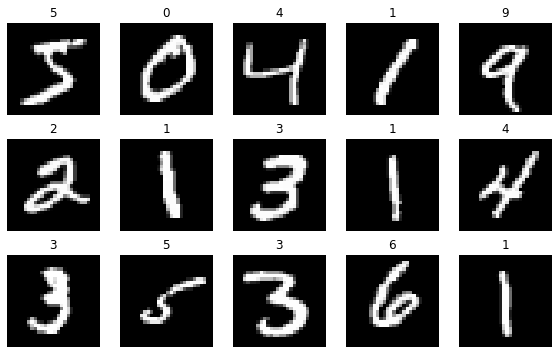

In [59]:
# 데이터 시각화
# canvas 생성
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i//5, i%5]
    ax.imshow(X_tr[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_tr[i]))

plt.tight_layout()
plt.show()

In [60]:
# 데이터 전처리
print(f'정규화 전] 최소값: {X_tr.min()}, 정규화 전] 최댓값: {X_tr.max()}')

X_tr = X_tr / X_tr.max()

print(f'정규화 후] 최소값: {X_tr.min()}, 정규화 후] 최댓값: {X_tr.max()}')

정규화 전] 최소값: 0, 정규화 전] 최댓값: 255
정규화 후] 최소값: 0.0, 정규화 후] 최댓값: 1.0


In [61]:
X_te = X_te / 255

In [62]:
X_te

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [63]:
X_tr.shape

(60000, 28, 28)

In [64]:
print(f'변경 전 shape: {X_tr.shape}')
print(f'1D으로 shape 변경 후 : {X_tr.reshape(60000, -1).shape}')

변경 전 shape: (60000, 28, 28)
1D으로 shape 변경 후 : (60000, 784)


In [65]:
print(f'변경 전 shape: {X_tr.shape}')
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(X_tr).shape}')

변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


In [40]:
# relu 활성화 함수 적용
tf.keras.layers.Dense(128, activation='relu')

In [41]:
from tensorflow.keras.layers import Flatten

In [66]:
model = Sequential()
# input layer
model.add(Flatten(input_shape=(28, 28)))

# hidden layer
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# output layer
model.add(Dense(10, activation='softmax'))

In [43]:
# 출력층 노드가 1인 경우
Dense(1, activation='sigmoid')

# 출력층 노드가 2개 이상인 경우
Dense(10, activation='softmax')

In [44]:
# 손실함수
# 이진 분류
model.compile(loss='binary_crossentropy')

In [45]:
# y가 원-핫 벡터인 경우
model.compile(loss='categorical_crossentropy')

# y가 원-핫 벡터가 아닌 경우
model.compile(loss='sparse_categorical_crossentropy')

In [46]:
# 옵티마이저
from tensorflow.keras.optimizers import Adam

In [47]:
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam)

In [67]:
# 평가 지표
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [68]:
# 훈련
model.fit(X_tr, y_tr,
          validation_data=(X_te, y_te),
          epochs=10,)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1889 - acc: 0.9431 - val_loss: 0.1060 - val_acc: 0.9671
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0808 - acc: 0.9749 - val_loss: 0.0927 - val_acc: 0.9724
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0581 - acc: 0.9815 - val_loss: 0.0789 - val_acc: 0.9768
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0425 - acc: 0.9866 - val_loss: 0.0698 - val_acc: 0.9802
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0331 - acc: 0.9893 - val_loss: 0.0776 - val_acc: 0.9778 0s - loss: 0.0328 - acc
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0307 - acc: 0.9898 - val_loss: 0.0646 - val_acc: 0.9830
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0219 - acc: 0.9928 - val_loss: 0.0851 - val_acc: 0.9794
Epoch 8/10
1875/1875 [================

In [69]:
# 평가
test_loss, test_acc = model.evaluate(X_te, y_te)

print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.0963 - acc: 0.9799
검증 셋 정확도: 0.9799000024795532


In [70]:
# 예측
predictions = model.predict(X_te)

In [71]:
predictions[0]

array([5.78708304e-10, 1.21953584e-11, 7.11345288e-11, 6.77042333e-09,
       3.30816867e-08, 3.18888138e-09, 4.24653599e-18, 9.99999166e-01,
       8.94950433e-11, 8.64475055e-07], dtype=float32)

In [2]:
print(np.argmax(predictions[0]))

NameError: name 'np' is not defined